# Climate_Analysis

[**Dataset**](https://www.kaggle.com/datasets/die9origephit/temperature-data-albany-new-york)

In [10]:
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
zfp ="/content/archive (30).zip"
dataframes = []


with zipfile.ZipFile(zfp, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        with zip_ref.open(file_name) as file:
            df = pd.read_csv(file)
            dataframes.append(df)


for i, df in enumerate(dataframes):
    print(f"Data from {zip_ref.namelist()[i]}:")
    print(df.head())
    print("\n")

<ipython-input-13-e8937800da85>:8: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


Data from daily_data.csv:
       STATION                 DATE REPORT_TYPE  SOURCE BackupElements  \
0  72518014735  2015-01-01T23:59:00       SOD         6         PRECIP   
1  72518014735  2015-01-02T23:59:00       SOD         6         PRECIP   
2  72518014735  2015-01-03T23:59:00       SOD         6         PRECIP   
3  72518014735  2015-01-04T23:59:00       SOD         6         PRECIP   
4  72518014735  2015-01-05T23:59:00       SOD         6         PRECIP   

   BackupElevation BackupEquipment  BackupLatitude  BackupLongitude  \
0              260         PLASTIC         42.6918        -73.83109   
1              260         PLASTIC         42.6918        -73.83109   
2              260         PLASTIC         42.6918        -73.83109   
3              260         PLASTIC         42.6918        -73.83109   
4              260         PLASTIC         42.6918        -73.83109   

       BackupName  ...  DailyPeakWindDirection  DailyPeakWindSpeed  \
0  NWS ALBANY, NY  ...          

Analysis for daily_data.csv:
Summary Statistics:
            STATION  SOURCE  BackupElevation  BackupLatitude  BackupLongitude  \
count  2.668000e+03  2668.0           2668.0     2668.000000      2668.000000   
mean   7.251801e+10     6.0            260.0       42.689750       -73.828268   
std    0.000000e+00     0.0              0.0        0.004187         0.005764   
min    7.251801e+10     6.0            260.0       42.681200       -73.831090   
25%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
50%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
75%    7.251801e+10     6.0            260.0       42.691800       -73.831090   
max    7.251801e+10     6.0            260.0       42.691800       -73.816500   

       DailyAverageDewPointTemperature  DailyAverageDryBulbTemperature  \
count                      2668.000000                     2668.000000   
mean                         38.217766                       50.107571   

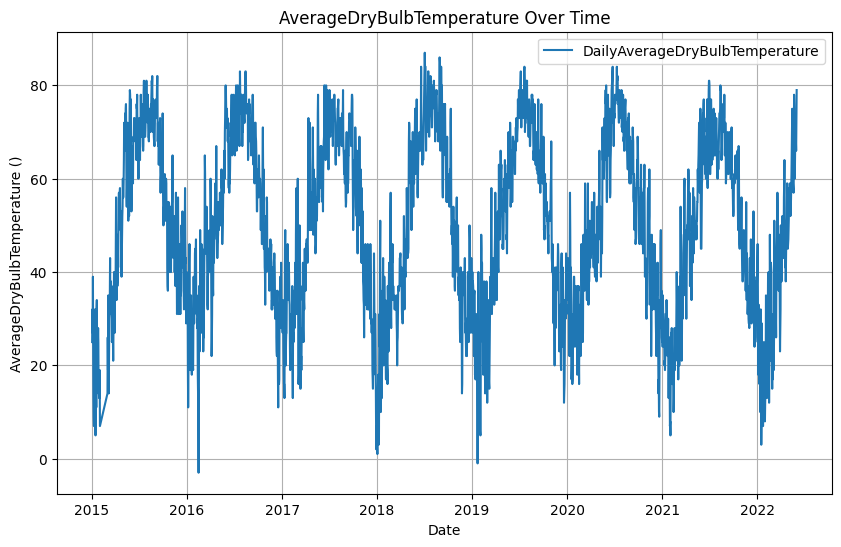

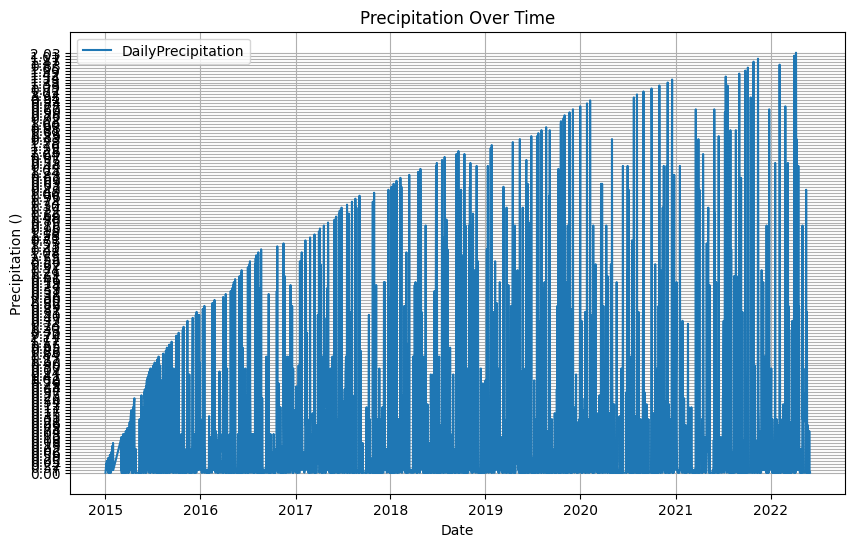

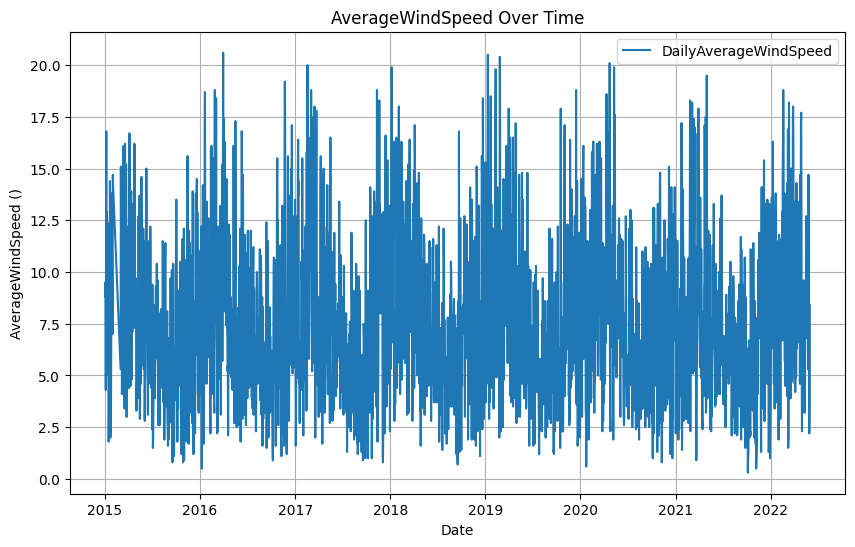



Analysis for hourly_data.csv:
Summary Statistics:
            STATION        SOURCE  BackupElevation  BackupLatitude  \
count  6.472900e+04  64729.000000          64729.0    64729.000000   
mean   7.251801e+10      6.994207            260.0       42.689775   
std    0.000000e+00      0.075894              0.0        0.004167   
min    7.251801e+10      6.000000            260.0       42.681200   
25%    7.251801e+10      7.000000            260.0       42.691800   
50%    7.251801e+10      7.000000            260.0       42.691800   
75%    7.251801e+10      7.000000            260.0       42.691800   
max    7.251801e+10      7.000000            260.0       42.691800   

       BackupLongitude  HourlyRelativeHumidity  HourlyVisibility  \
count     64729.000000            64729.000000      64729.000000   
mean        -73.828303               66.361538          9.315017   
std           0.005736               18.376979          2.128327   
min         -73.831090                8.00000

In [17]:
for i, df in enumerate(dataframes):
    # Print the analysis for each dataframe
    print(f"Analysis for {zip_ref.namelist()[i]}:")
    print("Summary Statistics:")
    print(df.describe())
    print("\n")

    # Check if 'DATE' column exists in the dataframe
    if 'DATE' in df.columns:
        # Convert 'DATE' column to datetime
        df['DATE'] = pd.to_datetime(df['DATE'])

        # Plot key variables over time if available
        variables_to_plot = ['DailyAverageDryBulbTemperature', 'DailyPrecipitation', 'DailyAverageWindSpeed']
        for var_name in variables_to_plot:
            if var_name in df.columns:
                plt.figure(figsize=(10, 6))
                plt.plot(df['DATE'], df[var_name], label=var_name)
                plt.xlabel('Date')
                plt.ylabel(f'{var_name.split("Daily")[1]} ({var_name.split("Daily")[0]})')
                plt.title(f'{var_name.split("Daily")[1]} Over Time')
                plt.legend()
                plt.grid(True)
                plt.show()
    print("\n")


Analysis for daily_data.csv:
Exploratory Data Analysis (EDA):
Removing non-numeric columns:
Index(['REPORT_TYPE', 'BackupElements', 'BackupEquipment', 'BackupName',
       'DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall',
       'WindEquipmentChangeDate'],
      dtype='object')
Correlation Matrix:
                                            STATION      DATE  SOURCE  \
STATION                                         NaN       NaN     NaN   
DATE                                            NaN  1.000000     NaN   
SOURCE                                          NaN       NaN     NaN   
BackupElevation                                 NaN       NaN     NaN   
BackupLatitude                                  NaN -0.682925     NaN   
BackupLongitude                                 NaN  0.682925     NaN   
DailyAverageDewPointTemperature                 NaN -0.007946     NaN   
DailyAverageDryBulbTemperature                  NaN -0.063140     NaN   
DailyAverageRelativeHumidity         

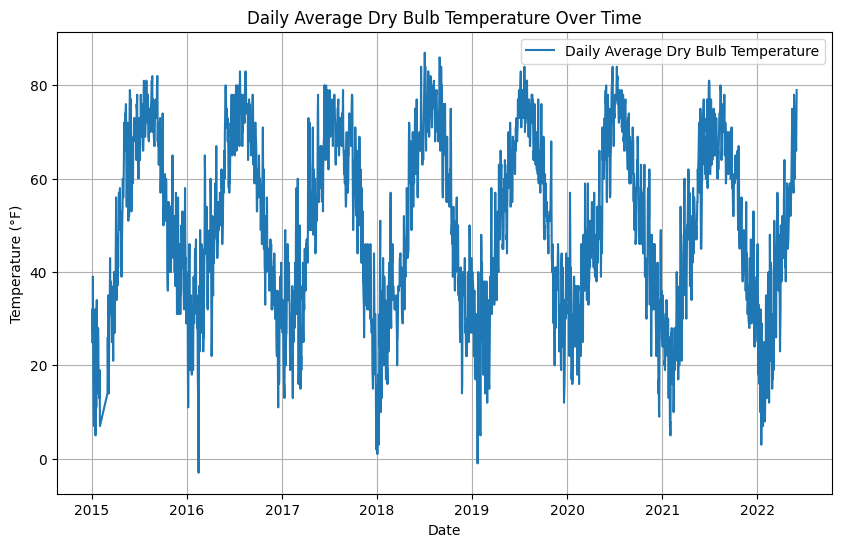

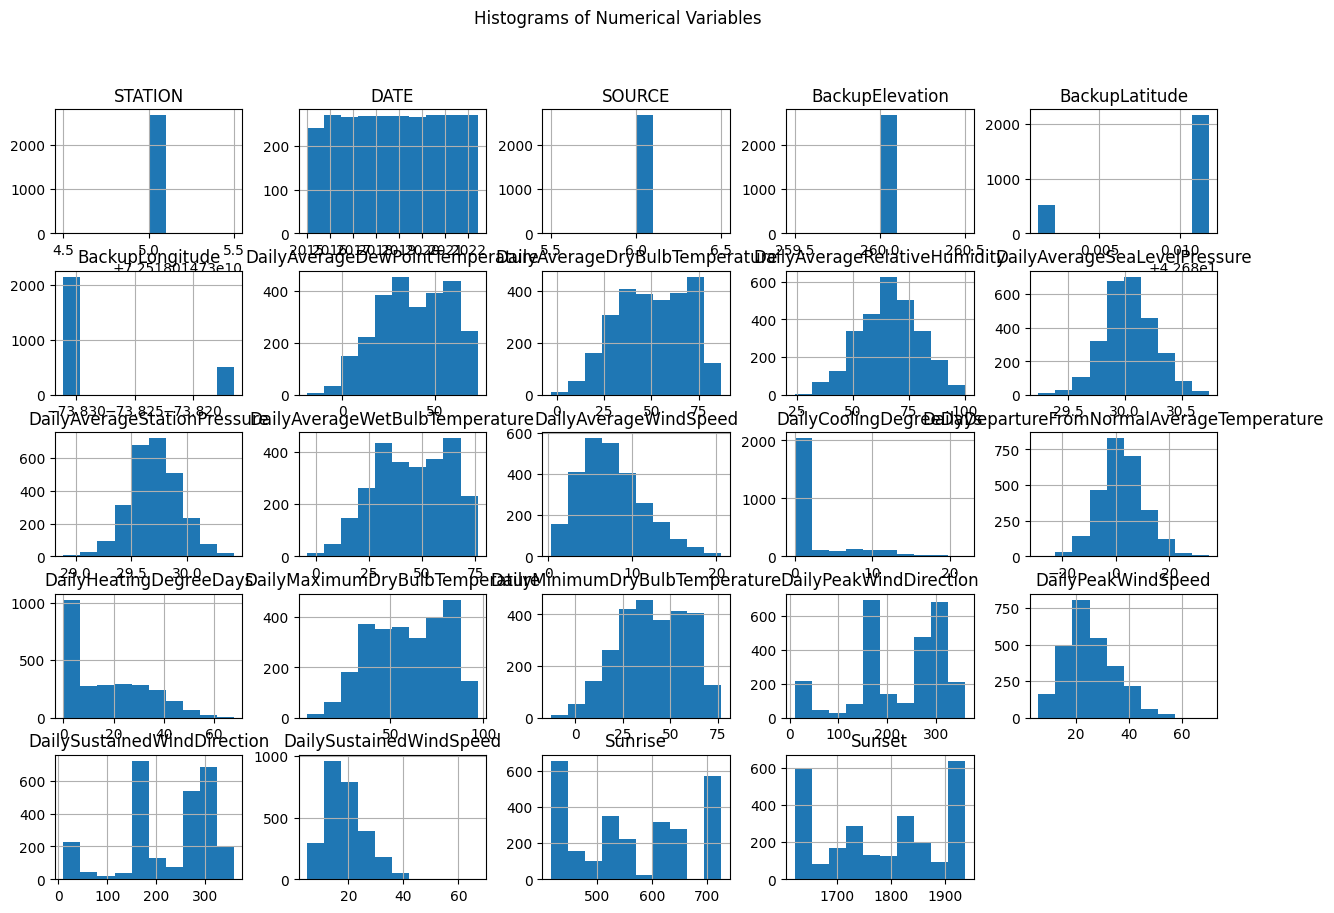

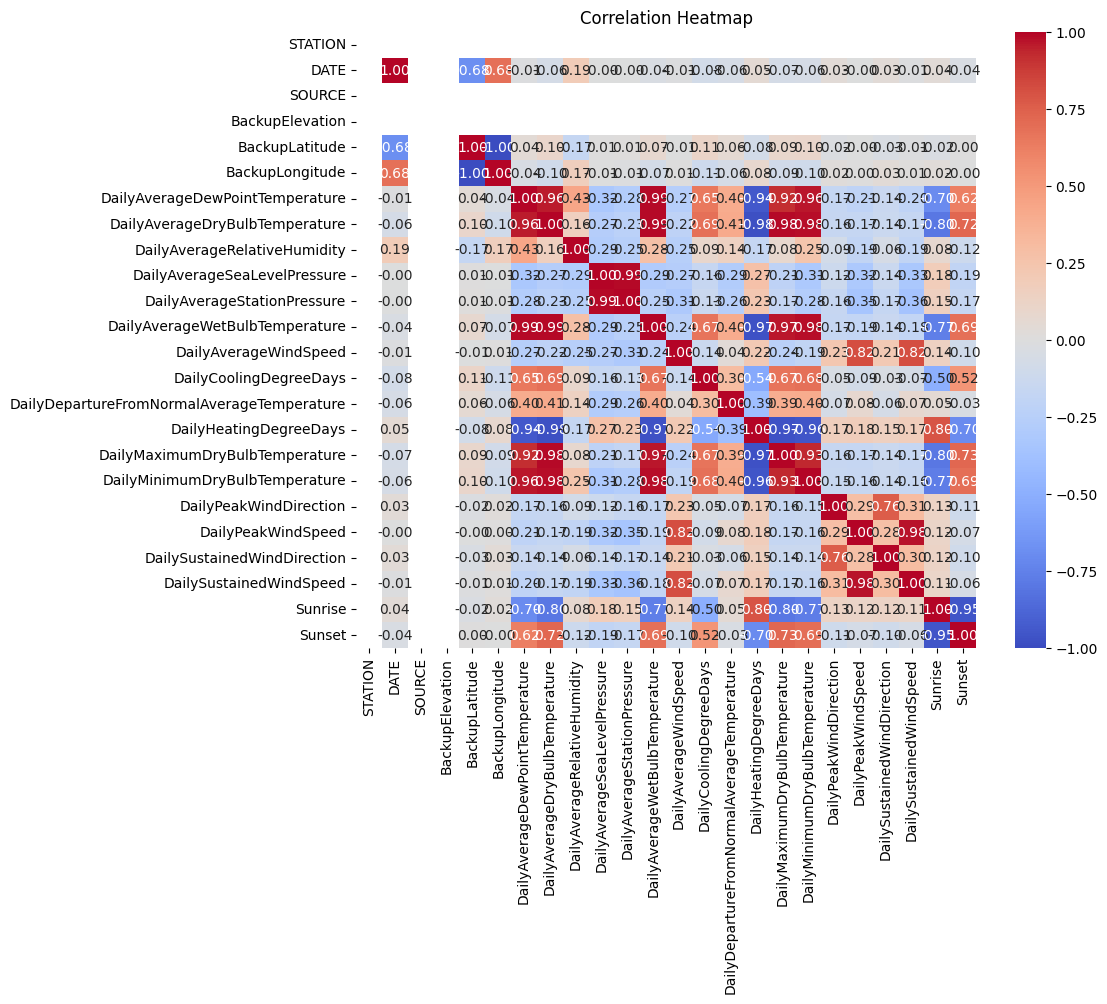



Analysis for hourly_data.csv:
Exploratory Data Analysis (EDA):


Analysis for monthly_data.csv:
Exploratory Data Analysis (EDA):


Analysis for three_hour_data.csv:
Exploratory Data Analysis (EDA):




In [18]:
for i, df in enumerate(dataframes):
    print(f"Analysis for {zip_ref.namelist()[i]}:")
    print("Exploratory Data Analysis (EDA):")
    if 'DATE' in df.columns and 'DailyAverageDryBulbTemperature' in df.columns:
        # Check for non-numeric columns
        non_numeric_cols = df.select_dtypes(include='object').columns
        if len(non_numeric_cols) > 0:
            print("Removing non-numeric columns:")
            print(non_numeric_cols)
            df = df.drop(non_numeric_cols, axis=1)

        # Calculate the correlation matrix
        print("Correlation Matrix:")
        print(df.corr())
        print("\n")

        # Statistical Analysis
        print("Statistical Analysis:")
        # You can perform hypothesis testing or additional statistical analysis here if applicable

        # Visualization
        print("Visualization:")
        # Plot time series data if available
        plt.figure(figsize=(10, 6))
        plt.plot(df['DATE'], df['DailyAverageDryBulbTemperature'], label='Daily Average Dry Bulb Temperature')
        plt.xlabel('Date')
        plt.ylabel('Temperature (°F)')
        plt.title('Daily Average Dry Bulb Temperature Over Time')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Visualize data distribution using histograms
        df.hist(figsize=(15, 10))
        plt.suptitle('Histograms of Numerical Variables')
        plt.show()

        # Create correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Correlation Heatmap')
        plt.show()
    # else:
    #     print("DATE or DailyAverageDryBulbTemperature columns not found in the DataFrame.")
    print("\n")